WEEK 4 : REAL/FAKE NEWS PREDITCION

DIFFERENT APPROACH ON OUR DATA

In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from wordcloud import WordCloud, STOPWORDS

import re, string
from bs4 import BeautifulSoup
import unicodedata

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Feature Selection
from sklearn.feature_selection import chi2, SelectKBest, RFE, mutual_info_classif
# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
# Univariate
from sklearn.feature_selection import SelectPercentile, f_classif

from sklearn.utils import shuffle

In [2]:
# Reading the True/Real news Data Set using pandas
True_data=pd.read_csv("F:\ExcelR\Excelr_Internship\Real_Fake News Prediction\Dataset\True.csv",encoding="Unicode_escape",error_bad_lines=False)
True_data.head()

C:\Users\nazee\AppData\Local\Temp\ipykernel_9564\2727937118.py:2: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



Skipping line 11067: expected 4 fields, saw 8



,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
# Skipping line 11067: expected 4 fields, saw 8
"""as we can see that the 11067 line has 8 columns instead of 4 as the remaining rows,
so the line 11067 has been removed automatically while reading the dataset"""
True_data.iloc[11067]
# checking if the line is skipped or not.

title      Biden sees growing progress in battle against ...
text       BALTIMORE (Reuters) - The U.S.-led battle agai...
subject                                         politicsNews
date                                       January 28, 2016 
Name: 11067, dtype: object

In [4]:
# Reading the False/Fake news Data Set using pandas
Fake_data=pd.read_csv("F:\ExcelR\Excelr_Internship\Real_Fake News Prediction\Dataset\Fake.csv",encoding="Unicode_escape",error_bad_lines=False)
Fake_data.head()

C:\Users\nazee\AppData\Local\Temp\ipykernel_9564\3642876878.py:2: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
# Creating a dataframe using pandas.
df_RealNews=pd.DataFrame(True_data)
print(df_RealNews.head())
print(df_RealNews.shape)

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
(21416, 4)


In [6]:
# info function gives us the raw information of data such as any null values, data types e.t.c.
df_RealNews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
# Checking for null values in the data and trying to remove them
print(df_RealNews.isnull().sum())
Realnews=pd.DataFrame(df_RealNews.dropna())
Realnews

title      0
text       0
subject    0
date       0
dtype: int64


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21411,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21412,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21413,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21414,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [8]:
# Obtaining the duplicate rows present in the real dataset
Duplicate = df_RealNews[df_RealNews.duplicated()]
print("Duplicate Rows are :",Duplicate)

Duplicate Rows are :                                                    title  \
445    Senate tax bill stalls on deficit-focused 'tri...   
778    Trump warns 'rogue regime' North Korea of grav...   
892    Republicans unveil tax cut bill, but the hard ...   
896    Trump taps Fed centrist Powell to lead U.S. ce...   
974    Two ex-Trump aides charged in Russia probe, th...   
...                                                  ...   
21227  France unveils labor reforms in first step to ...   
21262  Guatemala top court sides with U.N. graft unit...   
21289  Europeans, Africans agree renewed push to tack...   
21352  Thailand's ousted PM Yingluck has fled abroad:...   
21407  U.S., North Korea clash at U.N. forum over nuc...   

                                                    text       subject  \
445    WASHINGTON (Reuters) - The U.S. Senate on Thur...  politicsNews   
778    BEIJING (Reuters) - U.S. President Donald Trum...  politicsNews   
892    WASHINGTON (Reuters) - U.S. H

In [9]:
# Creating a new dataframe by dropping the duplicate rows from the data
Realnews=pd.DataFrame(df_RealNews.drop_duplicates().reset_index())
Realnews=Realnews.drop(["index"],axis=1)
Realnews

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21205,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21206,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21207,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21208,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [10]:
# Creating a dataframe using pandas.
df_Fakenews=pd.DataFrame(Fake_data)
print(df_Fakenews.head())
print(df_Fakenews.shape)

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamas Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
(23481, 4)


In [11]:
# info function gives us the raw information of data such as any null values, data types e.t.c.
df_Fakenews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [12]:
# Checking for null values in the data and trying to remove them
print(df_Fakenews.isnull().sum())
Fakenews=pd.DataFrame(df_Fakenews.dropna())
Fakenews

title      0
text       0
subject    0
date       0
dtype: int64


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [13]:
# Obtaining the duplicate rows present in the dataset
Duplicate = df_Fakenews[df_Fakenews.duplicated()]
print("Duplicate Rows are :",Duplicate)

Duplicate Rows are :                                                    title  \
9942   HILLARY TWEETS MESSAGE In Defense Of DACA&OOPS...   
11446  FORMER DEMOCRAT WARNS Young Americans: Rioter...   
14925  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...   

                                                    text   subject  \
9942   No time to waste   we've got to fight with eve...  politics   
11446   Who is silencing political speech, physically...  politics   
14925  They were probably just looking for a  safe sp...  politics   

               date  
9942    Sep 9, 2017  
11446  Mar 10, 2017  
14925  Nov 16, 2015  


In [14]:
# Creating a new dataframe by dropping the duplicate rows from the data
Fakenews=pd.DataFrame(df_Fakenews.drop_duplicates().reset_index())
Fakenews=Fakenews.drop(["index"],axis=1)
Fakenews

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23473,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23474,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23475,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23476,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [15]:
Realnews['category'] = 1
Fakenews['category'] = 0

In [16]:
news = pd.concat([Realnews,Fakenews]) #Merging the 2 datasets

In [17]:
# empty news
news.text[news.text.str.strip()==''].count()

631

In [18]:
news.drop(news.text[news.text.str.strip()==''].index,inplace=True) 

In [19]:
# empty news
news.text[news.text.str.strip()==''].count()

0

In [20]:
# From above we understand that subject is difrrent for both categories, HENCE WE HAVE TO EXCLUDE IT FROM FINAL TEXT COLUMN
news['news'] = news['text'] + " " + news['title']
news.drop(['subject', 'date', 'text', 'title'], axis=1, inplace=True)
news.head(5)

,category,news
0,1,WASHINGTON (Reuters) - The head of a conservat...
1,1,WASHINGTON (Reuters) - Transgender people will...
2,1,WASHINGTON (Reuters) - The special counsel inv...
3,1,WASHINGTON (Reuters) - Trump campaign adviser ...
4,1,SEATTLE/WASHINGTON (Reuters) - President Donal...


In [21]:
# Data Preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, words
stop_words = set(stopwords.words('english'))

# Stemming and Lemmatization
from nltk.stem import SnowballStemmer, WordNetLemmatizer

In [22]:
# Classification Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [23]:
def getAccuracyMostImportantWord(data, label='news'):
    vect = TfidfVectorizer()
    X = vect.fit_transform(data[label])
    y = news['category']

    new_feature = [] 
    s = SelectKBest(chi2, k=1)
    X_new = s.fit_transform(X, y)
    mask = s.get_support()
    for bool, feature in zip(mask, vect.get_feature_names_out()):
        if bool:
            new_feature.append(feature)
    print(new_feature)
    result = []
    for text in data[label]:
        if new_feature[0] in text:
            result.append(0)
        else:
            result.append(1)
    print(accuracy_score(news['category'], result))

In [24]:
news['news'].str.count('reuters').sum()

22

In [25]:
def wordopt(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\[[^]]*\]', '', text)
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)  
    text = re.sub('((?:Photo by|Featured image|Via:).+)', '', text)
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
   
    return text

news['news'] = news['news'].apply(wordopt)


C:\Users\nazee\AppData\Local\Temp\ipykernel_9564\360476032.py:4: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



In [26]:
news['news'].str.count('reuters').sum()

28432

In [27]:
news['news'].head()

0    washington  reuters    the head of a conservat...
1    washington  reuters    transgender people will...
2    washington  reuters    the special counsel inv...
3    washington  reuters    trump campaign adviser ...
4    seattle washington  reuters    president donal...
Name: news, dtype: object

In [28]:
news.shape

(43443, 2)

In [29]:
getAccuracyMostImportantWord(news)

['reuters']
0.008148608521510945


In [30]:
def preprocess(text):
    text = word_tokenize(text)
    text = [word.lower() for word in text if word.isalpha()]
    text = [word for word in text if word not in stop_words]
    text = [word for word in text if len(word) > 2]  # remove words with less than 3 characters
    return text

news['news'] = news['news'].apply(preprocess)

In [31]:
news.head()

,category,news
0,1,"[washington, reuters, head, conservative, repu..."
1,1,"[washington, reuters, transgender, people, all..."
2,1,"[washington, reuters, special, counsel, invest..."
3,1,"[washington, reuters, trump, campaign, adviser..."
4,1,"[seattle, washington, reuters, president, dona..."


In [32]:
def stem_lemmatize(text):
    stemmer = SnowballStemmer('english')
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [stemmer.stem(word) for word in text]
    return text
news['clean_news'] = news['news'].apply(stem_lemmatize)

In [33]:
def get_words(text):
  words = re.sub(r'[^\w\s]', '', text).split()
  return words

In [34]:
true_word = get_words(''.join(str((news[news.category == 1].clean_news).tolist())))

In [35]:
true_unigram=pd.DataFrame(true_word[:100])
true_unigram.to_csv("F:\True_unigram.csv",index=None)

In [36]:
true_bigrams_series = (pd.Series(nltk.ngrams(true_word, 2)).value_counts())[:100]
trutrue_bigrams_series=pd.DataFrame(true_bigrams_series[:100])
true_bigrams_series.to_csv("F:\True_bigrams_series.csv",index=None)
true_bigrams_series

(unit, state)           11765
(donald, trump)         10047
(white, hous)            9084
(washington, reuter)     6620
(north, korea)           5982
                        ...  
(senat, republican)       804
(real, estat)             803
(georg, bush)             796
(said, ad)                789
(presidenti, nomine)      786
Length: 100, dtype: int64

In [37]:
true_bigrams_series = (pd.Series(nltk.ngrams(true_word, 2)).value_counts())[:50]

Text(0.5, 0, '# of Occurances')

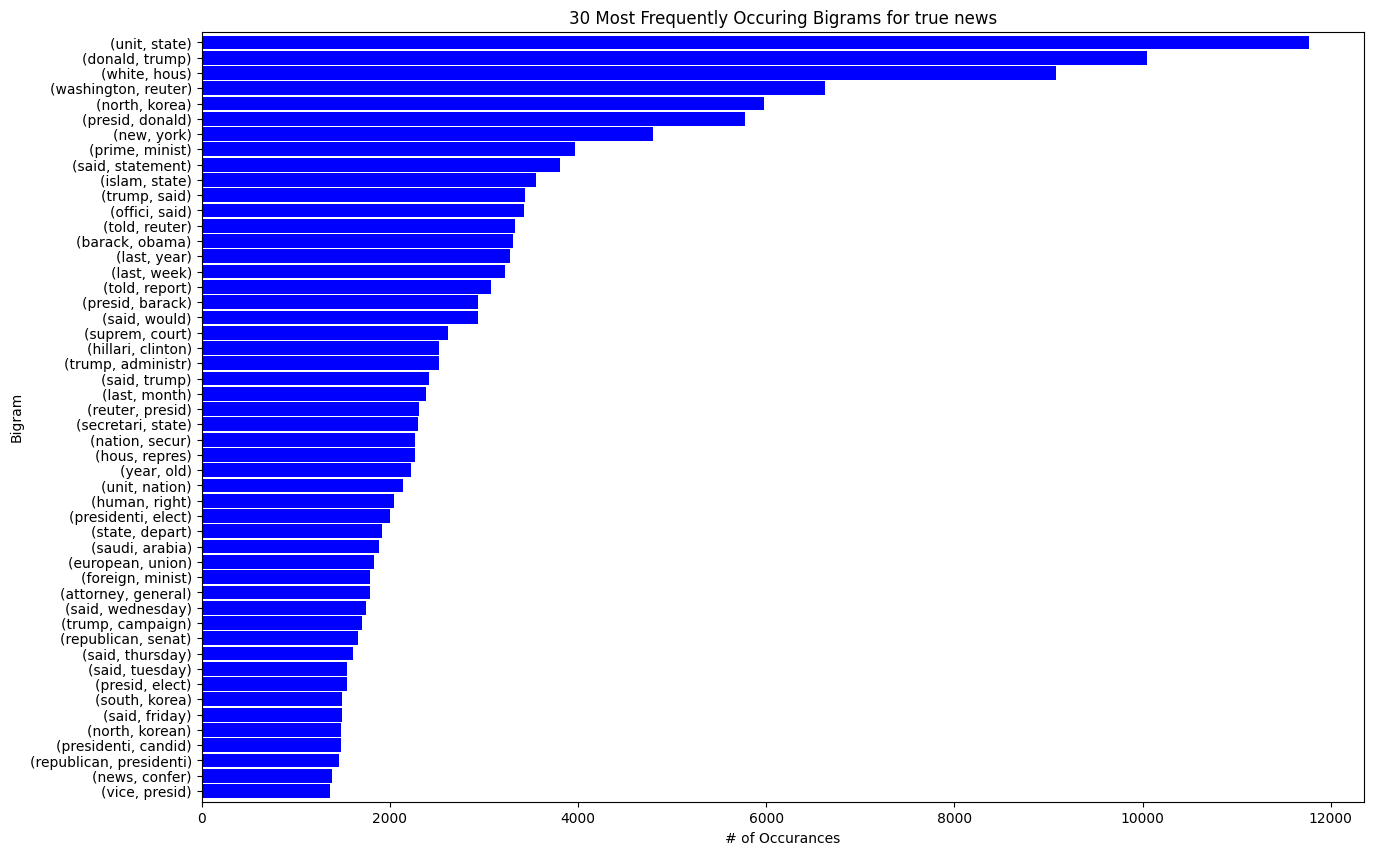

In [38]:
true_bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(15, 10))
plt.title('30 Most Frequently Occuring Bigrams for true news')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [39]:
false_word = get_words(''.join(str(news[news.category == 0].clean_news.tolist())))

In [40]:
false_bigrams_series = (pd.Series(nltk.ngrams(false_word, 2)).value_counts())[:20]
false_bigrams_series

(donald, trump)       16613
(hillari, clinton)     7512
(white, hous)          6929
(unit, state)          6688
(twitter, com)         6544
(pic, twitter)         6135
(presid, trump)        4485
(new, york)            4397
(presid, obama)        4171
(fox, news)            3625
(year, old)            3347
(trump, support)       2463
(barack, obama)        2451
(fake, news)           1984
(suprem, court)        1950
(centuri, wire)        1932
(trump, campaign)      1876
(nation, secur)        1844
(social, medium)       1836
(secretari, state)     1773
dtype: int64

Text(0.5, 0, '# of Occurances')

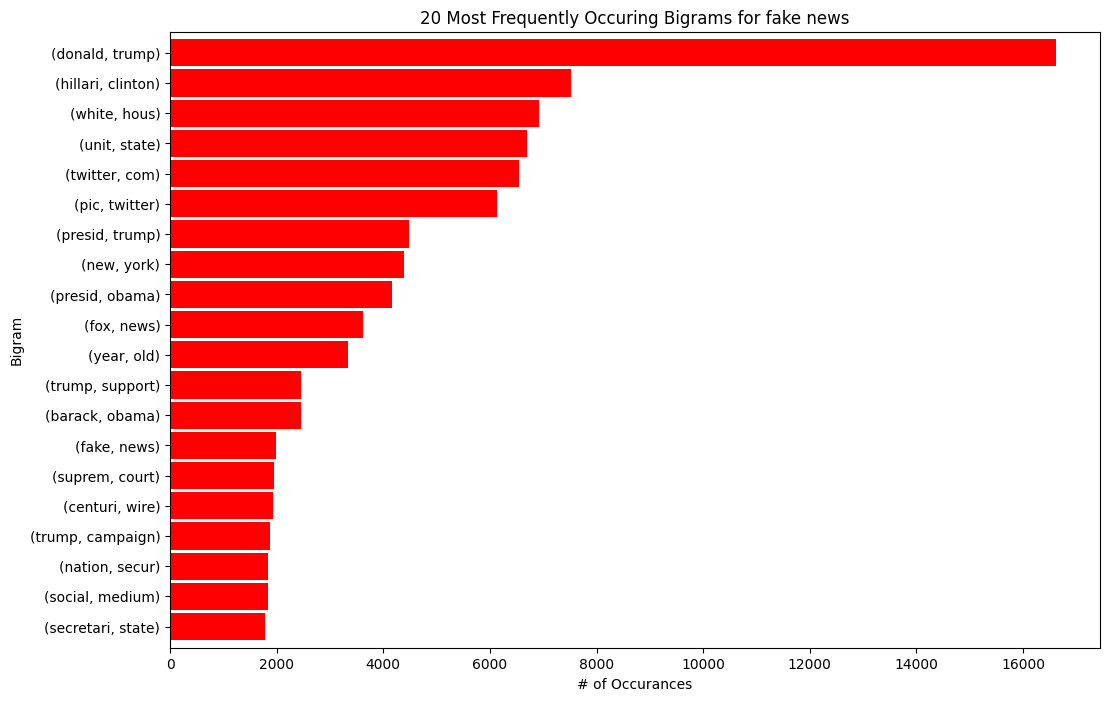

In [41]:
false_bigrams_series.sort_values().plot.barh(color='red', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams for fake news')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

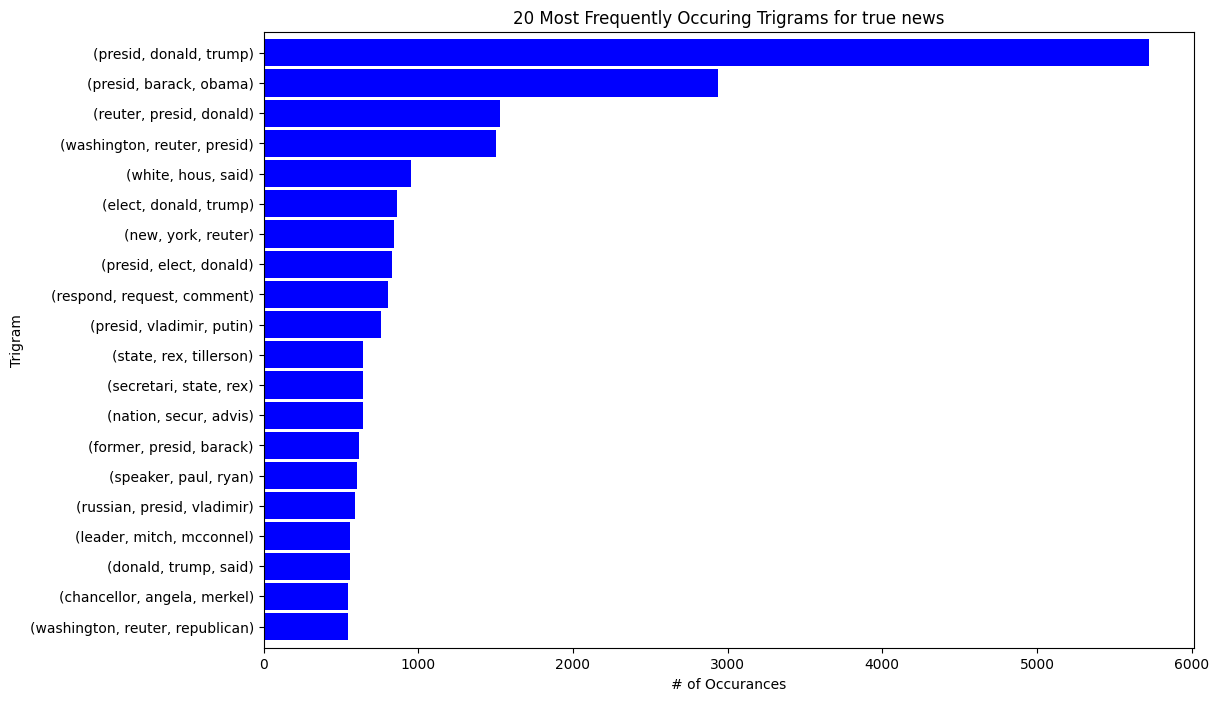

In [42]:
true_trigrams_series = (pd.Series(nltk.ngrams(true_word, 3)).value_counts())[:20]
true_trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams for true news')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

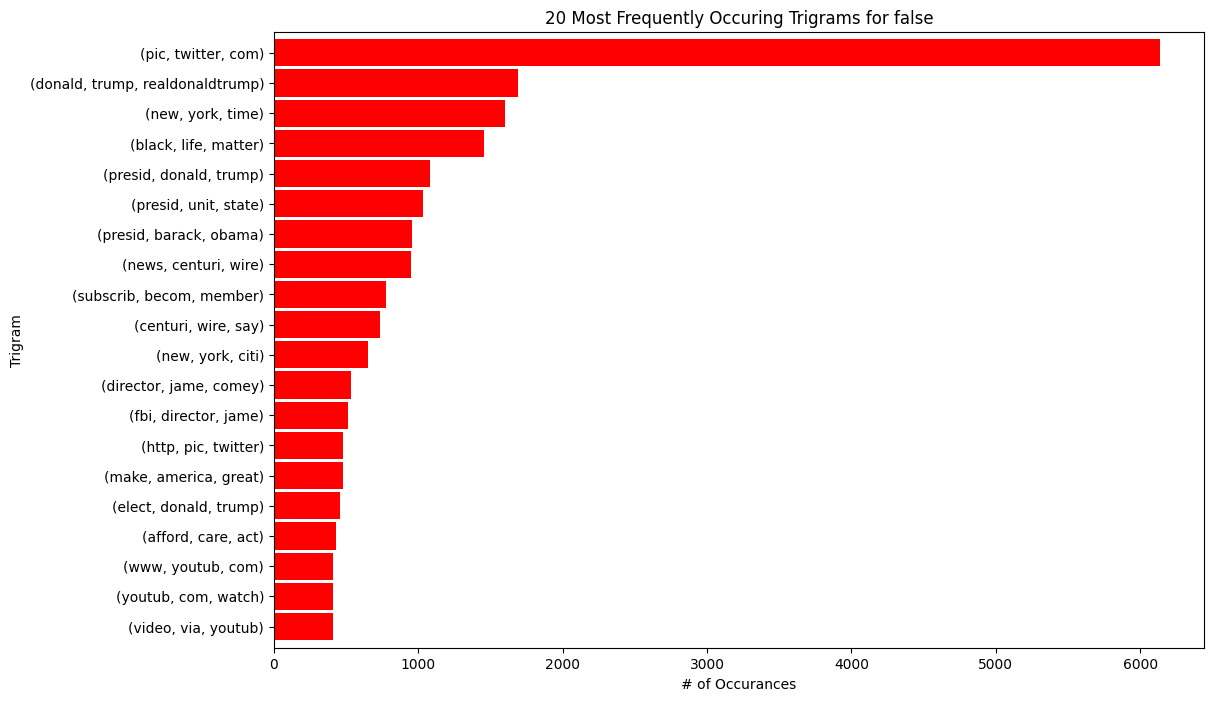

In [43]:
false_trigrams_series = (pd.Series(nltk.ngrams(false_word, 3)).value_counts())[:20]
false_trigrams_series.sort_values().plot.barh(color='red', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams for false')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [44]:
combined_words = get_words(''.join(str(news['clean_news'].tolist())))

In [45]:
bigrams_series = (pd.Series(nltk.ngrams(combined_words, 2)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

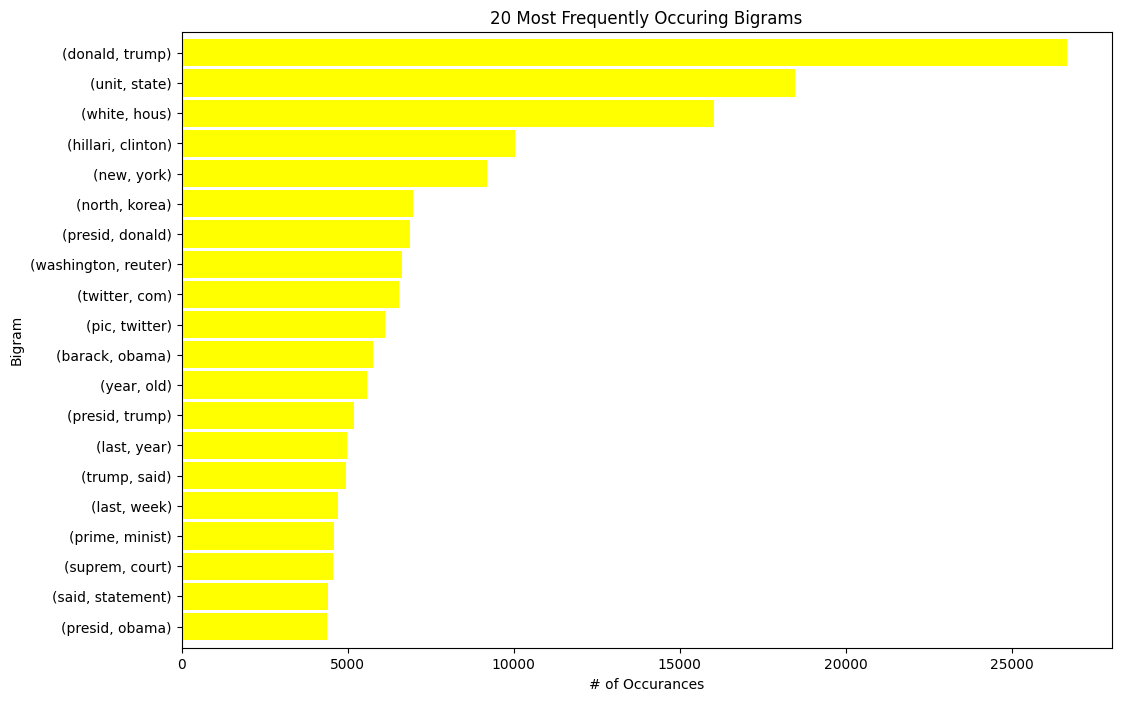

In [46]:
bigrams_series.sort_values().plot.barh(color='yellow', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [47]:
trigrams_series = (pd.Series(nltk.ngrams(combined_words, 3)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

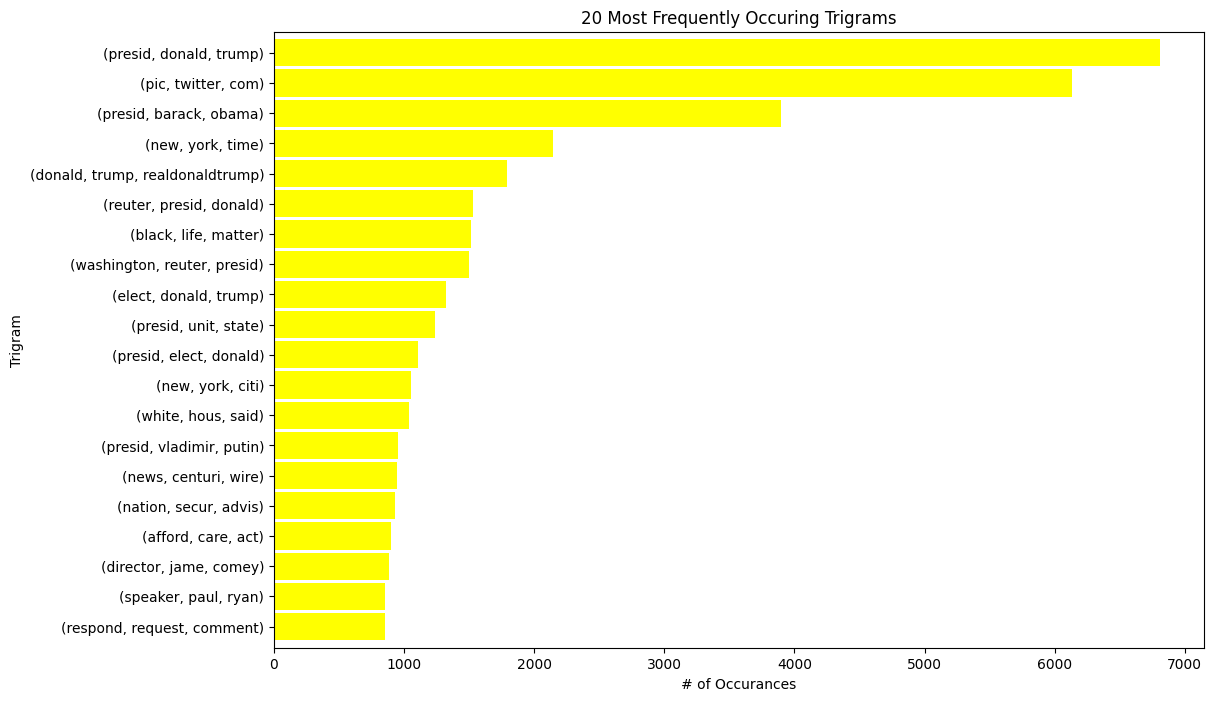

In [48]:
trigrams_series.sort_values().plot.barh(color='yellow', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [49]:
def extract_features(ngram_range=(1,1)):
    tfidf = TfidfVectorizer(ngram_range=ngram_range)
    features = tfidf.fit_transform(news['clean_news'].apply(lambda x: ' '.join(x)))
    print("Number of features using TfidfVectorizer:", features.shape[1])
    return features

In [50]:
# Tf-idf unigram
features_unigram = extract_features()

Number of features using TfidfVectorizer: 78350


In [51]:
# Tf-idf bigram
features_bigram = extract_features(ngram_range=(1,2))

Number of features using TfidfVectorizer: 3024114


In [52]:
# Tf-idf trigram
features_trigram = extract_features(ngram_range=(1,3))

Number of features using TfidfVectorizer: 9869164


In [58]:
# Tf-idf quadgram
features_quadgram = extract_features(ngram_range=(1,4))

Number of features using TfidfVectorizer: 18424154


In [60]:
# Tf-idf quadgram
features_polygram = extract_features(ngram_range=(1,5))

In [53]:
count_vectorizer = CountVectorizer()
features_count = count_vectorizer.fit_transform(news['clean_news'].apply(lambda x: ' '.join(x)))
print("Number of features using CountVectorizer:", features_count.shape[1])

Number of features using CountVectorizer: 78350


In [55]:
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    return text
news['clean_news'] = news['news'].apply(lemmatize)

In [56]:
# Get a list of English words
english_vocab = set(w.lower() for w in words.words())

In [59]:
# Get the vocabulary from the CountVectorizer object
vocabulary = count_vectorizer.get_feature_names_out()

In [ ]:
# Remove words not in English vocabulary
vocabulary = [word for word in vocabulary if word.lower() in english_vocab]

In [ ]:
# Create a new CountVectorizer object with the filtered vocabulary
count_vectorizer_filtered = CountVectorizer()
features_count_filtered = count_vectorizer_filtered.fit_transform(df['clean_news'].apply(lambda x: ' '.join(x)))
print("Number of features using CountVectorizer:", features_count_filtered.shape[1])

In [ ]:
def select_k_best(features, labels, k=5000):
    feature_selector = SelectKBest(chi2, k=k)
    features = feature_selector.fit_transform(features, labels)
    # Print the number of features selected
    print("Number of features selected using chi-square:", features.shape[1])
    return features

In [ ]:
labels = news['category']

In [ ]:
# Chi-square
features_unigram_chi2 = select_k_best(features_unigram, labels)
features_bigram_chi2 = select_k_best(features_bigram, labels)
features_trigram_chi2 = select_k_best(features_trigram, labels)
features_count_chi2 = select_k_best(features_count, labels)
features_count_filtered_chi2 = select_k_best(features_count_filtered, labels)

In [ ]:
def univariate(features, labels, percentile=10):
    feature_selector = SelectPercentile(f_classif, percentile=percentile)
    features = feature_selector.fit_transform(features, labels)
    # Print the number of features selected
    print("Number of features selected using univariate:", features.shape[1])
    return features

In [ ]:
features_unigram_uni = univariate(features_unigram, labels)
features_bigram_uni = univariate(features_bigram, labels)
features_trigram_uni = univariate(features_trigram, labels)
features_count_uni = univariate(features_count, labels)


In [ ]:
features_count_filtered_uni = univariate(features_count_filtered, labels)

In [ ]:
# Python program to generate word vectors using Word2Vec

# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec

# Reads ‘alice.txt’ file
sample = open("C:\\Users\\Admin\\Desktop\\alice.txt", "utf8")
s = sample.read()

# Replaces escape character with space
f = s.replace("\n", " ")

data = []

# iterate through each sentence in the file
for i in sent_tokenize(f):
	temp = []
	
	# tokenize the sentence into words
	for j in word_tokenize(i):
		temp.append(j.lower())

	data.append(temp)

# Create CBOW model
model1 = gensim.models.Word2Vec(news, min_count = 1,
							vector_size = 100, window = 5)

# Print results
print("Cosine similarity between 'alice' " +
			"and 'wonderland' - CBOW : ",
	model1.wv.similarity('alice', 'wonderland'))
	
print("Cosine similarity between 'alice' " +
				"and 'machines' - CBOW : ",
	model1.wv.similarity('alice', 'machines'))

# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100,
											window = 5, sg = 1)

# Print results
print("Cosine similarity between 'alice' " +
		"and 'wonderland' - Skip Gram : ",
	model2.wv.similarity('alice', 'wonderland'))
	
print("Cosine similarity between 'alice' " +
			"and 'machines' - Skip Gram : ",
	model2.wv.similarity('alice', 'machines'))
